In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/bac

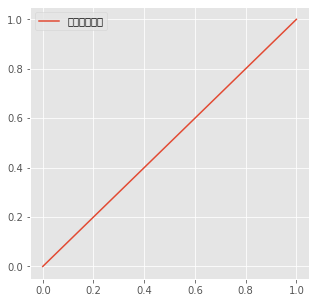

In [2]:
# Commented out IPython magic to ensure Python compatibility.
import matplotlib as mpl
import matplotlib.pyplot as plt
 
# %config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.style.use(['ggplot'])

plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [3]:
trip_survey = pd.read_csv("/content/drive/My Drive/★★경욱/2019년 국민여행조사(국내여행).csv", encoding="CP949")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,113,185,197,269,281,353,437,521,605) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
codebook = pd.read_csv("/content/drive/My Drive/★★경욱/코드북.csv", encoding = "CP949")

In [5]:
list_col = list(trip_survey.columns)

In [6]:
codebook.head()

,시/도코드,시/도명,시/군/구명,시/군/구
0,11,서울특별시,0,서울특별시
1,11,서울특별시,230,강남구
2,11,서울특별시,250,강동구
3,11,서울특별시,90,강북구
4,11,서울특별시,160,강서구


In [7]:
codebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시/도코드   245 non-null    int64 
 1   시/도명    245 non-null    object
 2   시/군/구명  245 non-null    int64 
 3   시/군/구   244 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.8+ KB


In [8]:
codebook = codebook.astype({'시/도코드':'str', '시/군/구명':'str'})
codebook['code'] = codebook['시/도코드'] + codebook['시/군/구명'] + '00000'
codebook['D_TRA1_1_SPOT1']= codebook['code'].str.slice(start=0, stop=5)
codebook.rename(columns={'시/군/구': 'name'}, inplace=True)
CodeBook = codebook.loc[:,['name', 'D_TRA1_1_SPOT1']]

In [ ]:
''' df2.dropna(thresh=5, inplace=True) '''
# 결측값 임계치 설정 n개이상 이면 행 삭제
''' df2.dropna(subset=['']) '''
# 특정 칼럼 내의 결측치만 삭제

" df2.dropna(subset=['']) "

# 부산 해운대구 여행 관련 6가지 변수 넣어서 f1-score 비교해보기

In [ ]:
list_col.index("D_TRA1_1_SPOT1")

91

In [ ]:
list_col.index("A12")

986

In [ ]:
list_col.index("A3_1")

729

In [ ]:
trip_survey.iloc[:,729]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
48264    NaN
48265    NaN
48266    NaN
48267    NaN
48268    NaN
Name: A3_1, Length: 48269, dtype: float64

In [ ]:
df1 = trip_survey.iloc[:,[91, 986]]; print(df1)

       D_TRA1_1_SPOT1  A12
0             21090.0  4.0
1             36460.0  4.0
2             21090.0  4.0
3             31370.0  4.0
4             39020.0  4.0
...               ...  ...
48264             NaN  NaN
48265             NaN  NaN
48266         39010.0  4.0
48267         39010.0  NaN
48268             NaN  NaN

[48269 rows x 2 columns]


In [ ]:
df2 = trip_survey.iloc[:,729:735]; print(df2)

       A3_1  A3_2  A3_3  A3_4  A3_5  A3_6
0       1.0   2.0   NaN   NaN   NaN   NaN
1       1.0   2.0   NaN   NaN   NaN   6.0
2       1.0   2.0   3.0   NaN   NaN   6.0
3       1.0   2.0   3.0   NaN   NaN   NaN
4       1.0   2.0   3.0   NaN   NaN   6.0
...     ...   ...   ...   ...   ...   ...
48264   NaN   NaN   NaN   NaN   NaN   NaN
48265   NaN   NaN   NaN   NaN   NaN   NaN
48266   NaN   2.0   NaN   NaN   NaN   6.0
48267   NaN   NaN   NaN   NaN   NaN   NaN
48268   NaN   NaN   NaN   NaN   NaN   NaN

[48269 rows x 6 columns]


In [ ]:
# df2.shape

In [ ]:
df3 = pd.concat([df1, df2], axis=1)

In [ ]:
# df3

In [ ]:
df3 = df3.dropna(subset=['D_TRA1_1_SPOT1'])

In [ ]:
df3 # 여행 지역 및 만족도, 여행에서의 작은 분류들 

,D_TRA1_1_SPOT1,A12,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6
0,21090.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN
1,36460.0,4.0,1.0,2.0,NaN,NaN,NaN,6.0
2,21090.0,4.0,1.0,2.0,3.0,NaN,NaN,6.0
3,31370.0,4.0,1.0,2.0,3.0,NaN,NaN,NaN
4,39020.0,4.0,1.0,2.0,3.0,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...
48259,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48260,11210.0,4.0,NaN,NaN,NaN,NaN,5.0,6.0
48262,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48266,39010.0,4.0,NaN,2.0,NaN,NaN,NaN,6.0


In [ ]:
del df1
del df2

In [ ]:
df3.head()

,D_TRA1_1_SPOT1,A12,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6
0,21090.0,4.0,1.0,2.0,NaN,NaN,NaN,NaN
1,36460.0,4.0,1.0,2.0,NaN,NaN,NaN,6.0
2,21090.0,4.0,1.0,2.0,3.0,NaN,NaN,6.0
3,31370.0,4.0,1.0,2.0,3.0,NaN,NaN,NaN
4,39020.0,4.0,1.0,2.0,3.0,NaN,NaN,6.0


In [ ]:
df3_copy = df3.copy()

In [ ]:
df3_copy = df3_copy.fillna(0)

In [ ]:
df_21090 = df3_copy[df3_copy['D_TRA1_1_SPOT1'] == 21090]

In [ ]:
df_21090['score'] = np.where(df_21090.A12>=5, '만족',
                           np.where( df_21090.A12>=2,'보통', '불만족'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_21090

,D_TRA1_1_SPOT1,A12,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,score
0,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,보통
2,21090.0,4.0,1.0,2.0,3.0,0.0,0.0,6.0,보통
284,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,보통
313,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,보통
418,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,보통
...,...,...,...,...,...,...,...,...,...
47769,21090.0,4.0,1.0,0.0,0.0,0.0,0.0,6.0,보통
47859,21090.0,3.0,0.0,2.0,3.0,0.0,5.0,0.0,보통
47955,21090.0,5.0,1.0,2.0,0.0,0.0,0.0,6.0,만족
48008,21090.0,4.0,1.0,0.0,0.0,4.0,0.0,0.0,보통


## 만족도 3part로 재 분류 후 라벨 부여

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
result = le.fit_transform(df_21090.score)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
le.classes_

array(['만족', '보통', '불만족'], dtype=object)

In [ ]:
df_21090['dummy'] = result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_21090.head()

,D_TRA1_1_SPOT1,A12,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,score,dummy
0,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,보통,1
2,21090.0,4.0,1.0,2.0,3.0,0.0,0.0,6.0,보통,1
284,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,보통,1
313,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,보통,1
418,21090.0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,보통,1


In [ ]:
df_21090_copy = df_21090.drop(['D_TRA1_1_SPOT1', 'A12', 'score'], axis = 1)

In [ ]:
df_21090_copy.head()

,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,dummy
0,1.0,2.0,0.0,0.0,0.0,0.0,1
2,1.0,2.0,3.0,0.0,0.0,6.0,1
284,1.0,2.0,0.0,0.0,0.0,0.0,1
313,1.0,2.0,0.0,0.0,0.0,0.0,1
418,1.0,2.0,0.0,0.0,0.0,6.0,1


In [ ]:
X = df_21090_copy.iloc[:,0:6]
y = df_21090_copy.iloc[:,6]

In [ ]:
X

,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6
0,1.0,2.0,0.0,0.0,0.0,0.0
2,1.0,2.0,3.0,0.0,0.0,6.0
284,1.0,2.0,0.0,0.0,0.0,0.0
313,1.0,2.0,0.0,0.0,0.0,0.0
418,1.0,2.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...
47769,1.0,0.0,0.0,0.0,0.0,6.0
47859,0.0,2.0,3.0,0.0,5.0,0.0
47955,1.0,2.0,0.0,0.0,0.0,6.0
48008,1.0,0.0,0.0,4.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state = 42)

In [ ]:
print(X_test.shape); print(X_train.shape)

(487, 6)
(210, 6)


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [ ]:
xgb_model = xgb.XGBClassifier(silent = False, 
                              booster = "gbtree",
                              scale_pos_weight = 1,
                              learning_rate = 0.01,
                              colsample_bytree = 0.4,
                              objective = "binary:logistic",
                              n_estimators = 100,
                              max_depth = 4,
                              seed = 777)

In [ ]:
pred = xgb_model.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.77      1.00      0.87       375
           2       0.00      0.00      0.00        26

    accuracy                           0.77       487
   macro avg       0.26      0.33      0.29       487
weighted avg       0.59      0.77      0.67       487



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


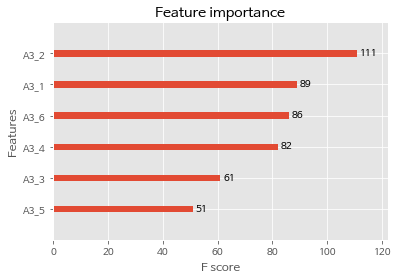

In [ ]:
plot_importance(xgb_model)

# 머신러닝 돌리기전에 필요한 열 추출한 후 데이터 전처리

In [ ]:
list_col.index("BSEX")

1013

In [ ]:
list_col.index("BAGE")

1014

In [ ]:
list_col.index("A12")

986

In [ ]:
df1 = trip_survey.iloc[:,1013:1015]
df2 = trip_survey.iloc[:, 986:989]

In [ ]:
df3 = pd.concat([df1, df2], axis = 1)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48269 entries, 0 to 48268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BSEX    48269 non-null  int64  
 1   BAGE    48269 non-null  int64  
 2   A12     22898 non-null  float64
 3   A13     22898 non-null  float64
 4   A14     22898 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.8 MB


In [ ]:
df3_copy = df3.copy()

In [ ]:
df3_copy.isnull().sum()

BSEX        0
BAGE        0
A12     25371
A13     25371
A14     25371
dtype: int64

In [ ]:
df3_copy = df3_copy.fillna(0)

In [ ]:
df3_copy['score'] = np.ceil((df3_copy['A12'] + df3_copy['A13'] + df3_copy['A14'])/3) 

In [ ]:
df3_copy.head()

,BSEX,BAGE,A12,A13,A14,score
0,1,3,4.0,4.0,4.0,4.0
1,1,5,4.0,5.0,4.0,5.0
2,1,1,4.0,5.0,4.0,5.0
3,1,4,4.0,4.0,4.0,4.0
4,1,6,4.0,4.0,4.0,4.0


In [ ]:
df3_copy.drop(['A12','A13','A14'], axis = 1, inplace=True)

In [ ]:
df3_copy

,BSEX,BAGE,score
0,1,3,4.0
1,1,5,5.0
2,1,1,5.0
3,1,4,4.0
4,1,6,4.0
...,...,...,...
48264,2,5,0.0
48265,2,3,0.0
48266,2,1,4.0
48267,1,3,0.0


In [ ]:
del df1
del df2
del df3

In [ ]:
df4 = trip_survey.iloc[:,729:746]

In [ ]:
df4.head()

,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17
0,1.0,2.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,NaN,NaN,6.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,3.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df4_copy = df4.copy()

In [ ]:
df4_copy = df4_copy.fillna(0)

In [ ]:
del df4

In [ ]:
df5 = pd.concat([df3_copy, df4_copy], axis = 1)

In [ ]:
df5

,BSEX,BAGE,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17
0,1,3,4.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,5.0,1.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,5.0,1.0,2.0,3.0,0.0,0.0,6.0,7.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,4.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,6,4.0,1.0,2.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48265,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48266,2,1,4.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
48267,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df5 = df5.drop(['BSEX', 'BAGE'], axis = 1)

In [ ]:
df5.head()

,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17
0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,1.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1.0,2.0,3.0,0.0,0.0,6.0,7.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,1.0,2.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df5.columns - df5.score

ValueError: ignored

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df5.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,A3_1,2.492174
1,A3_2,1.864562
2,A3_3,1.031861
3,A3_4,1.111656
4,A3_5,1.054165
5,A3_6,1.938611
6,A3_7,1.025521
7,A3_8,1.078512
8,A3_9,1.039219
9,A3_10,1.001807


In [ ]:
CodeBook.head()

,name,D_TRA1_1_SPOT1
0,서울특별시,11000
1,강남구,11230
2,강동구,11250
3,강북구,11900
4,강서구,11160


# 장소, 나이, 성별, 만족도 데이터 만드는 함수

In [ ]:
def make_df(sexcode, agecode, listLike):
    df1 = trip_survey.iloc[:,1013:1015]
    df2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df1, df2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df1 = trip_survey.iloc[:, 91]
    df0 = trip_survey.iloc[:,listLike]
    df2 = pd.concat([df1,df3, df0], axis=1)
    SpotSexAge = df2.copy()
    # df1 = SpotSexAge.loc[SpotSexAge['D_TRA1_1_SPOT1'].isin(se)]
    df2 = SpotSexAge.loc[SpotSexAge['BSEX'].isin([int(f'{sexcode}')])]
    SpotSexAge_city = df2.loc[SpotSexAge['BAGE'].isin([int(f'{agecode}')])]
    SpotSexAge_city = SpotSexAge_city.fillna(0)
    SpotSexAge_city =  SpotSexAge_city.astype({'D_TRA1_1_SPOT1':'int'})
    SpotSexAge_city =  SpotSexAge_city.astype({'D_TRA1_1_SPOT1':'str'})
    SpotSexAgeCity_Sati = pd.merge(CodeBook, SpotSexAge_city, how='inner')
    return SpotSexAgeCity_Sati

In [ ]:
areaC = ['11230', '11250', '11090', '11160', '11210', '11050', '11170', '11180', '11110', '11100', '11060', '11200', '11140', '11130', '11220', '11040', '11080','11240', '11150', '11190', '11030', '11120', '11010', '11070', '11020']
LISTa = [729, 730, 731, 732, 733, 734, 735, 736, 737, 738]

In [ ]:
dfK = make_df(1, 2, LISTa)

In [ ]:
dfK

,name,D_TRA1_1_SPOT1,BSEX,BAGE,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10
0,강남구,11230,1,2,4.0,1.0,2.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,0.0
1,강남구,11230,1,2,4.0,0.0,2.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0
2,강남구,11230,1,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
3,강남구,11230,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,강남구,11230,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,진도군,36470,1,2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
890,함평군,36430,1,2,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
891,함평군,36430,1,2,4.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
892,화순군,36370,1,2,5.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
SMOTE_df = dfK.iloc[:,4:]

In [ ]:
SMOTE_df.head()

,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10
0,4.0,1.0,2.0,0.0,0.0,0.0,6.0,0.0,8.0,0.0,0.0
1,4.0,0.0,2.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
smote_melt = pd.melt(SMOTE_df, id_vars=['score'])

In [ ]:
smote_melt = smote_melt.dropna()

In [ ]:
smote_melt

,score,variable,value
0,4.0,A3_1,1.0
1,4.0,A3_1,0.0
2,5.0,A3_1,0.0
3,0.0,A3_1,0.0
4,0.0,A3_1,0.0
...,...,...,...
8935,3.0,A3_10,0.0
8936,4.0,A3_10,0.0
8937,4.0,A3_10,0.0
8938,5.0,A3_10,0.0


In [ ]:
y = smote_melt.iloc[:,0]
X = smote_melt.iloc[:,2]

In [ ]:
X

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8935    0.0
8936    0.0
8937    0.0
8938    0.0
8939    0.0
Name: value, Length: 8940, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold, train_test_split, cross_val_score

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

In [ ]:
d
# from sklearn.model_selection import GridSearchCV, train_test_split
# X = np.array(X)
# y = np.array(y)
# X = X.reshape(-1,1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_statefrom sklearn.model_selection import GridSearchCV, train_test_split
# target = 'score'
# cols_to_drop = ['BSEX', 'BAGE', target]
# cols_to_fit = [col for col in df5.columns if col not in cols_to_drop]
# train_split, val_split = train_test_split(df5, test_size=0.3, shuffle = True)
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# grid = GridSearchCV(logreg, param_grid, cv=rskfold, return_train_score=True, iid=False)
# grid.fit(X_train, y_train)
# grid.score(X_test, y_test), grid.best_params_, grid.best_score_
# grid = GridSearchCV(logreg, param_grid, cv=rskfold, return_train_score=True, iid=False)
# grid.fit(X_train, y_train)
# grid.score(X_test, y_test), grid.best_params_, grid.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(0.5676733780760627, {'C': 0.001}, 0.5683725498819838)

In [ ]:
def ():
df1 = trip_survey.iloc[:,1013:1015]
df2 = trip_survey.iloc[:, 986:989]
df3 = pd.concat([df1, df2], axis = 1)
df3 = df3.fillna(0)
df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
df4 = trip_survey.iloc[:,729:746]
df4 = df4.fillna(0)
df5 = pd.concat([df3, df4], axis = 1)
mask = (df5.BSEX == int(2)) & (df5.BAGE == int(2))
M_20 = df5.loc[mask,:]
X = M_20.iloc[:,3:]
y = M_20.iloc[:,2]

logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
xgb = XGBClassifier()
lgbm = LGBMClassifier()
from sklearn.model_selection import GridSearchCV, train_test_split
target = 'score'
cols_to_drop = ['BSEX', 'BAGE', target]
cols_to_fit = [col for col in df5.columns if col not in cols_to_drop]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(lgbm, param_grid, cv=rskfold, return_train_score=True, iid=False)
grid.fit(X_train, y_train)
grid.score(X_test, y_test), grid.best_params_, grid.best_score_
target = 'score'
cols_to_drop = ['BSEX', 'BAGE', target]
cols_to_fit = [col for col in df5.columns if col not in cols_to_drop]

model = LGBMClassifier()
model.fit(X_train, y_train)

feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('XGBoost Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold, train_test_split, cross_val_score


def MLmodel_KFold_acc(df, depth, estimator, learning_rates):
    X = df.iloc[:,5:]
    y = df.iloc[:,4]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
    model = XGBClassifier()
    kfold = KFold(n_splits = 7, random_state = 42, shuffle = True)
    # results = cross_val_score(model, X, y, cv = kfold)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    # acc = ("Accuracy : %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
    
    m1_lgbm = lgb.LGBMClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'), )
    accuracy1 = np.mean(cross_val_score(m1_lgbm, X, y, scoring="accuracy", cv=kfold))
    
    # m2_log = LogisticRegression(solver='newton-cg', penalty = 'l2')
    # accuracy2 = np.mean(cross_val_score(m2_log, X_train, y_train, scoring="accuracy", cv=kfold))  

    # m3_knn_5 = KNeighborsClassifier(n_neighbors = 5)
    # m3_knn_10 = KNeighborsClassifier(n_neighbors = 10)
    # m3_knn_30 = KNeighborsClassifier(n_neighbors = 30)
    # accuracy3 = np.max([np.mean(cross_val_score(m3_knn_5, X_train, y_train, scoring="accuracy", cv=kfold)),
    #                       np.mean(cross_val_score(m3_knn_10, X_train, y_train, scoring="accuracy", cv=kfold)),
    #                       np.mean(cross_val_score(m3_knn_30, X_train, y_train, scoring="accuracy", cv=kfold))])
    
    m4_rf = RandomForestClassifier(n_estimators=int(f'{estimator}'), random_state=6)
    accuracy4 = np.mean(cross_val_score(m4_rf, X, y, scoring="accuracy", cv=kfold))

    m5_svc = SVC(gamma='scale', random_state=7)
    accuracy5 = np.mean(cross_val_score(m5_svc, X_train, y_train, scoring="accuracy", cv=kfold))

    m6_gb = XGBClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy6 = np.mean(cross_val_score(m6_gb, X, y, scoring="accuracy", cv=kfold))

    m7_ada = AdaBoostClassifier(n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy7 = np.mean(cross_val_score(m7_ada, X_train, y_train, scoring="accuracy", cv=kfold))

    m8_gradient =  GradientBoostingClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy8 = np.mean(cross_val_score(m8_gradient, X_train, y_train, scoring="accuracy", cv=kfold))

    print("LGBM : ", accuracy1)
    # print("Logistic : ", accuracy2)
    # print("KNeighbors : ", accuracy3)
    print("RandomForest : ", accuracy4)
    print("SVC : ", accuracy5)
    print("XGBoost : ", accuracy6)
    print("AdaBoost : ", accuracy7)
    print("Gradient : ", accuracy8)

In [ ]:
y = smote_melt.iloc[:,0]
X = smote_melt.iloc[:,2]

In [ ]:
MLmodel_KFold_acc(X, y, 3, 5000, 0.001)

IndexError: ignored

## ML 연습 - 남자, 20대 ML 분석 후 영향하는 변수 찾기

In [ ]:
mask = (df5.BSEX == 1) & (df5.BAGE == 2)
M_20 = df5.loc[mask,:]

In [ ]:
M_20['score'].value_counts()

0.0    1790
4.0    1312
5.0     570
3.0      83
2.0       6
Name: score, dtype: int64

In [ ]:
M_20.head()

,BSEX,BAGE,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17
24,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,1,2,4.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,1,2,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = M_20.iloc[:,3:]
y = M_20.iloc[:,2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 777)

In [ ]:
print(X_train.shape); print(X_test.shape)

(3008, 17)
(753, 17)


In [ ]:
X_train

,A3_1,A3_2,A3_3,A3_4,A3_5,A3_6,A3_7,A3_8,A3_9,A3_10,A3_11,A3_12,A3_13,A3_14,A3_15,A3_16,A3_17
9578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13453,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46614,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35776,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

9578     0.0
2849     0.0
46877    0.0
18153    4.0
13453    4.0
        ... 
47124    0.0
37272    0.0
46614    5.0
35776    4.0
26578    4.0
Name: score, Length: 3008, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred = model.predict(X_test)

In [ ]:
predictions = [round(value) for value in pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 80.88%


print("Accuracy : %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

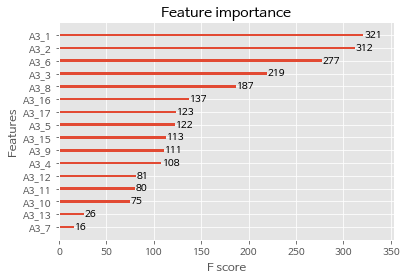

In [ ]:
plot_importance(model)

# 다중공선성 VIF 확인

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def MLmodel_vif(sex, age, lista):
    listA = []
    df1 = trip_survey.iloc[:,1013:1015]
    df2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df1, df2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df4 = trip_survey.iloc[:,lista]
    df4 = df4.fillna(0)
    df5 = pd.concat([df3, df4], axis = 1)
    mask = (df5.BSEX == int(f'{sex}')) & (df5.BAGE == int(f'{age}'))
    M_20 = df5.loc[mask,:]
    return M_20

In [ ]:
LISTa = [729, 730, 731, 732, 733, 736, 739, 743, 744]
df = MLmodel_vif(1, 2, LISTa)
df

,BSEX,BAGE,score,A3_1,A3_2,A3_3,A3_4,A3_5,A3_8,A3_11,A3_15,A3_16
24,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,1,2,4.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
185,1,2,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
191,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48158,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48172,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48183,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48216,1,2,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
    y, X = dmatrices('score ~ A3_1+A3_2+A3_3+A3_4+A3_5+A3_8+A3_11+A3_15+A3_16', df, return_type = 'dataframe')

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns 
    vif

,VIF Factor,features
0,1.728410,Intercept
1,1.318849,A3_1
2,1.331357,A3_2
3,1.013985,A3_3
4,1.054738,A3_4
5,1.019126,A3_5
6,1.027898,A3_8
7,1.031622,A3_11
8,1.043530,A3_15
9,1.031445,A3_16


In [ ]:
y, X = dmatrices('score ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

NameError: ignored

# XGBoost 정확도 및 feature 중요도 파악 

In [ ]:
# lgbm 시각화 및 weights 파악
import lightgbm as lgb

df1 = trip_survey.iloc[:,1013:1015]
df2 = trip_survey.iloc[:, 986:989]
df3 = pd.concat([df1, df2], axis = 1)
df3 = df3.fillna(0)
df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
df4 = trip_survey.iloc[:,729:746]
df4 = df4.fillna(0)
df5 = pd.concat([df3, df4], axis = 1)
mask = (df5.BSEX == int(2)) & (df5.BAGE == int(2))
M_20 = df5.loc[mask,:]
X = M_20.iloc[:,3:]
y = M_20.iloc[:,2]

target = 'score'
cols_to_drop = ['BSEX', 'BAGE', target]
cols_to_fit = [col for col in df5.columns if col not in cols_to_drop]
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, shuffle = True)

model = lgb.LGBMClassifier(n_estimators = 400)
model.fit(X_train, y_train)

feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

# perm = PermutationImportance(model).fit(val_split[cols_to_fit], val_split[target])
# eli5.show_weights(perm, feature_names=list(cols_to_fit))

ValueError: ignored

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


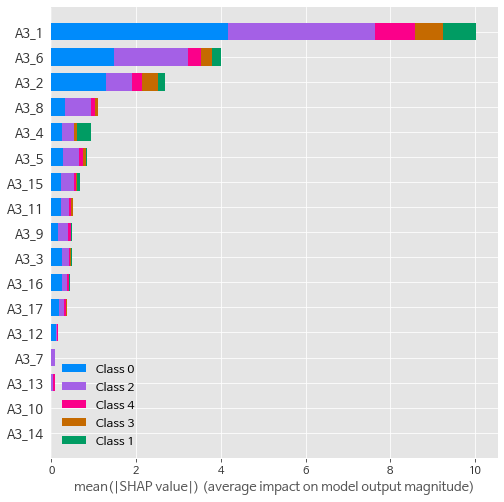

In [ ]:
import shap 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(val_split[cols_to_fit])
shap.summary_plot(shap_values, val_split[cols_to_fit])

In [ ]:
df1 = trip_survey.iloc[:,1013:1015]
df2 = trip_survey.iloc[:, 986:989]
df3 = pd.concat([df1, df2], axis = 1)
df3 = df3.fillna(0)
df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
df4 = trip_survey.iloc[:,729:746]
df4 = df4.fillna(0)
df5 = pd.concat([df3, df4], axis = 1)
mask = (df5.BSEX == int(2)) & (df5.BAGE == int(2))
M_20 = df5.loc[mask,:]
X = M_20.iloc[:,3:]
y = M_20.iloc[:,2]

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier



# 1번 2번

model=xgb.XGBClassifier()
param_grid={'booster' :['gbtree'],
                 'silent':[True],
                 'max_depth':[5,6,8],
                 'min_child_weight':[1,3,5],
                 'gamma':[0,1,2,3],
                 'nthread':[4],
                 'colsample_bytree':[0.5,0.8],
                 'colsample_bylevel':[0.9],
                 'n_estimators':[50]}

In [ ]:
# 3번
cv=KFold(n_splits=6, random_state=1)

# 4번
gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=4)

# 5번
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)
gcv.fit(X_train.values,y_train.values)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ValueError: ignored

# ML 모델 함수화

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold


def MLmodel_Kfold_acc(sex, age, depth, estimator, learning_rates, lista):
    listA = []
    df1 = trip_survey.iloc[:,1013:1015]
    df2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df1, df2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df4 = trip_survey.iloc[:,lista]
    df4 = df4.fillna(0)
    df5 = pd.concat([df3, df4], axis = 1)
    mask = (df5.BSEX == int(f'{sex}')) & (df5.BAGE == int(f'{age}'))
    M_20 = df5.loc[mask,:]
    X = M_20.iloc[:,3:]
    y = M_20.iloc[:,2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)
    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)

    
    m1_lgbm = lgb.LGBMClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy1 = np.mean(cross_val_score(m1_lgbm, X_train, y_train, scoring="accuracy", cv=kfold))
    
     # m2_log = LogisticRegression(solver='newton-cg', penalty = 'l2')
    # accuracy2 = np.mean(cross_val_score(m2_log, X_train, y_train, scoring="accuracy", cv=kfold))  

    m3_knn_5 = KNeighborsClassifier(n_neighbors = 5)
    m3_knn_10 = KNeighborsClassifier(n_neighbors = 10)
    m3_knn_30 = KNeighborsClassifier(n_neighbors = 30)
    accuracy3 = np.max([np.mean(cross_val_score(m3_knn_5, X_train, y_train, scoring="accuracy", cv=kfold)),
                          np.mean(cross_val_score(m3_knn_10, X_train, y_train, scoring="accuracy", cv=kfold)),
                          np.mean(cross_val_score(m3_knn_30, X_train, y_train, scoring="accuracy", cv=kfold))])
    
    m4_rf = RandomForestClassifier(n_estimators=int(f'{estimator}'), random_state=42)
    accuracy4 = np.mean(cross_val_score(m4_rf, X_train, y_train, scoring="accuracy", cv=kfold))

    m5_svc = SVC(gamma='scale', random_state=42)
    accuracy5 = np.mean(cross_val_score(m5_svc, X_train, y_train, scoring="accuracy", cv=kfold))

    m6_gb = XGBClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy6 = np.mean(cross_val_score(m6_gb, X_train, y_train, scoring="accuracy", cv=kfold))

    m7_ada = AdaBoostClassifier(n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy7 = np.mean(cross_val_score(m7_ada, X_train, y_train, scoring="accuracy", cv=kfold))

    m8_gradient =  GradientBoostingClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy8 = np.mean(cross_val_score(m8_gradient, X_train, y_train, scoring="accuracy", cv=kfold))

    print("LGBM : ", accuracy1)
    # print("Logistic : ", accuracy2)
    print("KNeighbors : ", accuracy3)
    print("RandomForest : ", accuracy4)
    print("SVC : ", accuracy5)
    print("XGBoost : ", accuracy6)
    print("AdaBoost : ", accuracy7)
    print("Gradient : ", accuracy8)

In [ ]:
LISTa = [729, 730, 731, 732, 736, 737, 739]
MLmodel_Kfold_acc(2, 2, 5, 1000, 0.1, LISTa)

LGBM :  0.7768406837353856
KNeighbors :  0.7794268906319373
RandomForest :  0.7781337871836614
SVC :  0.7807162942134083
XGBoost :  0.7794268906319373
AdaBoost :  0.7764096492526268
Gradient :  0.7781356371170638


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold

# 분류분석에 필요한 교차검증인 StratifiedKFold
def MLmodel_SKfold_acc(sex, age, depth, estimator, learning_rates, lista):
    listA = []
    df1 = trip_survey.iloc[:,1013:1015]
    df2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df1, df2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df4 = trip_survey.iloc[:,lista]
    df4 = df4.fillna(0)
    df5 = pd.concat([df3, df4], axis = 1)
    mask = (df5.BSEX == int(f'{sex}')) & (df5.BAGE == int(f'{age}'))
    M_20 = df5.loc[mask,:]
    X = M_20.iloc[:,3:]
    y = M_20.iloc[:,2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)
    skfold = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    
    m1_lgbm = lgb.LGBMClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy1 = np.mean(cross_val_score(m1_lgbm, X_train, y_train, scoring="accuracy", cv=skfold))
    
    m2_log = LogisticRegression(solver='newton-cg', penalty = 'l2')
    accuracy2 = np.mean(cross_val_score(m2_log, X_train, y_train, scoring="accuracy", cv=skfold))  

    m3_knn_5 = KNeighborsClassifier(n_neighbors = 5)
    m3_knn_10 = KNeighborsClassifier(n_neighbors = 10)
    m3_knn_30 = KNeighborsClassifier(n_neighbors = 30)
    accuracy3 = np.max([np.mean(cross_val_score(m3_knn_5, X_train, y_train, scoring="accuracy", cv=skfold)),
                          np.mean(cross_val_score(m3_knn_10, X_train, y_train, scoring="accuracy", cv=skfold)),
                          np.mean(cross_val_score(m3_knn_30, X_train, y_train, scoring="accuracy", cv=skfold))])
    
    m4_rf = RandomForestClassifier(n_estimators=int(f'{estimator}'), random_state=42)
    accuracy4 = np.mean(cross_val_score(m4_rf, X_train, y_train, scoring="accuracy", cv=skfold))

    m5_svc = SVC(gamma='scale', random_state=42)
    accuracy5 = np.mean(cross_val_score(m5_svc, X_train, y_train, scoring="accuracy", cv=skfold))

    m6_gb = XGBClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy6 = np.mean(cross_val_score(m6_gb, X_train, y_train, scoring="accuracy", cv=skfold))

    m7_ada = AdaBoostClassifier(n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy7 = np.mean(cross_val_score(m7_ada, X_train, y_train, scoring="accuracy", cv=skfold))

    m8_gradient =  GradientBoostingClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy8 = np.mean(cross_val_score(m8_gradient, X_train, y_train, scoring="accuracy", cv=skfold))

    print("LGBM : ", accuracy1)
    print("Logistic : ", accuracy2)
    print("KNeighbors : ", accuracy3)
    print("RandomForest : ", accuracy4)
    print("SVC : ", accuracy5)
    print("XGBoost : ", accuracy6)
    print("AdaBoost : ", accuracy7)
    print("Gradient : ", accuracy8)

In [10]:
LISTa = [729, 730, 731, 732, 733, 736, 739, 743, 744]
MLmodel_SKfold_acc(1, 2, 50, 1000, 0.001, LISTa)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

LGBM :  0.7952114342609361
Logistic :  0.8012936414600184
KNeighbors :  0.8001544000404037
RandomForest :  0.7997727289124898
SVC :  0.7971140179363786
XGBoost :  0.8043318590774959
AdaBoost :  0.7902742404455956
Gradient :  0.8039501879495818


# ML 모델 함수화 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# 분류분석에 필요한 또 다른 교차검증인 RepeatedStratifiedKFold
def MLmodel_RSKfold_acc(sex, age, depth, estimator, learning_rates, lista):
    listA = []
    df1 = trip_survey.iloc[:,1013:1015]
    df2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df1, df2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df4 = trip_survey.iloc[:,lista]
    df4 = df4.fillna(0)
    df5 = pd.concat([df3, df4], axis = 1)
    mask = (df5.BSEX == int(f'{sex}')) & (df5.BAGE == int(f'{age}'))
    M_20 = df5.loc[mask,:]
    X = M_20.iloc[:,3:]
    y = M_20.iloc[:,2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    rskfold = RepeatedStratifiedKFold(n_splits=3, random_state=42)
    
    m1_lgbm = lgb.LGBMClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy1 = np.mean(cross_val_score(m1_lgbm, X_train, y_train, scoring="accuracy", cv=rskfold))
    
     # m2_log = LogisticRegression(solver='newton-cg', penalty = 'l2')
    # accuracy2 = np.mean(cross_val_score(m2_log, X_train, y_train, scoring="accuracy", cv=kfold))  

    m3_knn_5 = KNeighborsClassifier(n_neighbors = 5)
    m3_knn_10 = KNeighborsClassifier(n_neighbors = 10)
    m3_knn_30 = KNeighborsClassifier(n_neighbors = 30)
    accuracy3 = np.max([np.mean(cross_val_score(m3_knn_5, X_train, y_train, scoring="accuracy", cv=rskfold)),
                          np.mean(cross_val_score(m3_knn_10, X_train, y_train, scoring="accuracy", cv=rskfold)),
                          np.mean(cross_val_score(m3_knn_30, X_train, y_train, scoring="accuracy", cv=rskfold))])
    
    m4_rf = RandomForestClassifier(n_estimators=int(f'{estimator}'), random_state=42)
    accuracy4 = np.mean(cross_val_score(m4_rf, X_train, y_train, scoring="accuracy", cv=rskfold))

    m5_svc = SVC(gamma='scale', random_state=42)
    accuracy5 = np.mean(cross_val_score(m5_svc, X_train, y_train, scoring="accuracy", cv=rskfold))

    m6_gb = XGBClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy6 = np.mean(cross_val_score(m6_gb, X_train, y_train, scoring="accuracy", cv=rskfold))

    m7_ada = AdaBoostClassifier(n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy7 = np.mean(cross_val_score(m7_ada, X_train, y_train, scoring="accuracy", cv=rskfold))

    m8_gradient =  GradientBoostingClassifier(max_depth=int(f'{depth}'), n_estimators=int(f'{estimator}'), learning_rate=float(f'{learning_rates}'))
    accuracy8 = np.mean(cross_val_score(m8_gradient, X_train, y_train, scoring="accuracy", cv=rskfold))

    print("LGBM : ", accuracy1)
    # print("Logistic : ", accuracy2)
    print("KNeighbors : ", accuracy3)
    print("RandomForest : ", accuracy4)
    print("SVC : ", accuracy5)
    print("XGBoost : ", accuracy6)
    print("AdaBoost : ", accuracy7)
    print("Gradient : ", accuracy8)

In [ ]:
LISTa = [729, 730, 731, 732, 733, 736, 739, 743, 744]
MLmodel_RSKfold_acc(1, 2, 10, 1000, 0.01, LISTa)

LGBM :  0.7981374604007415
KNeighbors :  0.8002277471430957
RandomForest :  0.7956679558341103
SVC :  0.8015188626235813
XGBoost :  0.7952112494361515
AdaBoost :  0.7631099411346578
Gradient :  0.7968459120231964


In [ ]:
import lightgbm as lgb

def MLmodel_LGBMplot(sex, age, lista):
    df1 = trip_survey.iloc[:,1013:1015]
    df2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df1, df2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df4 = trip_survey.iloc[:,lista]
    df4 = df4.fillna(0)
    df5 = pd.concat([df3, df4], axis = 1)
    mask = (df5.BSEX == int(f'{sex}')) & (df5.BAGE == int(f'{age}'))
    M_20 = df5.loc[mask,:]
    # X = M_20.iloc[:,3:]
    # y = M_20.iloc[:,2]
    train_split, val_split = train_test_split(M_20, test_size=0.3)

    target = 'score'
    cols_to_drop = ['BSEX', 'BAGE', target]
    cols_to_fit = [col for col in M_20.columns if col not in cols_to_drop]
    
    model = lgb.LGBMClassifier(learning_rate=0.01, n_estimators=300)
    model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])])
    feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Importance','Feature'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance.sort_values(by="Importance", ascending=False))
    plt.title('LightGBM')
    plt.tight_layout()
    plt.show()

[1]	valid_0's multi_logloss: 1.11822
[2]	valid_0's multi_logloss: 1.11154
[3]	valid_0's multi_logloss: 1.10497
[4]	valid_0's multi_logloss: 1.09852
[5]	valid_0's multi_logloss: 1.09219
[6]	valid_0's multi_logloss: 1.08595
[7]	valid_0's multi_logloss: 1.07983
[8]	valid_0's multi_logloss: 1.07382
[9]	valid_0's multi_logloss: 1.0679
[10]	valid_0's multi_logloss: 1.0621
[11]	valid_0's multi_logloss: 1.05639
[12]	valid_0's multi_logloss: 1.05078
[13]	valid_0's multi_logloss: 1.04526
[14]	valid_0's multi_logloss: 1.03983
[15]	valid_0's multi_logloss: 1.03449
[16]	valid_0's multi_logloss: 1.02924
[17]	valid_0's multi_logloss: 1.02408
[18]	valid_0's multi_logloss: 1.01899
[19]	valid_0's multi_logloss: 1.014
[20]	valid_0's multi_logloss: 1.00908
[21]	valid_0's multi_logloss: 1.00424
[22]	valid_0's multi_logloss: 0.999475
[23]	valid_0's multi_logloss: 0.994791
[24]	valid_0's multi_logloss: 0.990175
[25]	valid_0's multi_logloss: 0.985632
[26]	valid_0's multi_logloss: 0.981164
[27]	valid_0's multi

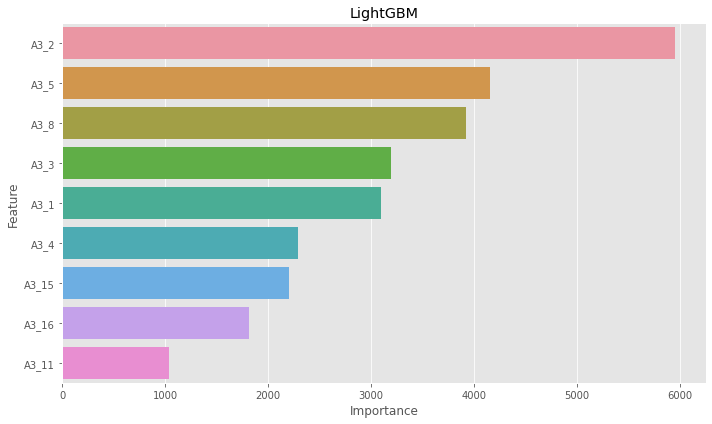

In [ ]:
LISTa = [729, 730, 731, 732, 733, 736, 739, 743, 744]
MLmodel_LGBMplot(1, 2, LISTa)

In [ ]:
import xgboost as xgb

def MLmodel_XGBplot(sex, age, listK):
    df_1 = trip_survey.iloc[:,1013:1015]
    df_2 = trip_survey.iloc[:, 986:989]
    df3 = pd.concat([df_1, df_2], axis = 1)
    df3 = df3.fillna(0)
    df3['score'] = np.ceil((df3['A12'] + df3['A13'] + df3['A14'])/3)
    df3.drop(['A12','A13','A14'], axis = 1, inplace=True)
    df4 = trip_survey.iloc[:,listK]
    df4 = df4.fillna(0)
    df5 = pd.concat([df3, df4], axis = 1)
    mask = (df5.BSEX == int(f'{sex}')) & (df5.BAGE == int(f'{age}'))
    M_20 = df5.loc[mask,:]
    # X = M_20.iloc[:,3:]
    # y = M_20.iloc[:,2]
    train_split, val_split = train_test_split(M_20, test_size=0.3)

    target = 'score'
    cols_to_drop = ['BSEX', 'BAGE', target]
    cols_to_fit = [col for col in M_20.columns if col not in cols_to_drop]
    
    model = xgb.XGBClassifier()
    model.fit(
    train_split[cols_to_fit], train_split[target],
    eval_set=[(val_split[cols_to_fit], val_split[target])])
    feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
    plt.title('XGBoost Features')
    plt.tight_layout()
    plt.show()

[0]	validation_0-merror:0.250694
[1]	validation_0-merror:0.250694
[2]	validation_0-merror:0.250694
[3]	validation_0-merror:0.250694
[4]	validation_0-merror:0.250694
[5]	validation_0-merror:0.250694
[6]	validation_0-merror:0.244218
[7]	validation_0-merror:0.245143
[8]	validation_0-merror:0.244218
[9]	validation_0-merror:0.244218
[10]	validation_0-merror:0.244218
[11]	validation_0-merror:0.244218
[12]	validation_0-merror:0.244218
[13]	validation_0-merror:0.247919
[14]	validation_0-merror:0.246994
[15]	validation_0-merror:0.244218
[16]	validation_0-merror:0.244218
[17]	validation_0-merror:0.246994
[18]	validation_0-merror:0.246994
[19]	validation_0-merror:0.244218
[20]	validation_0-merror:0.244218
[21]	validation_0-merror:0.244218
[22]	validation_0-merror:0.243293
[23]	validation_0-merror:0.243293
[24]	validation_0-merror:0.243293
[25]	validation_0-merror:0.243293
[26]	validation_0-merror:0.243293
[27]	validation_0-merror:0.243293
[28]	validation_0-merror:0.243293
[29]	validation_0-merror

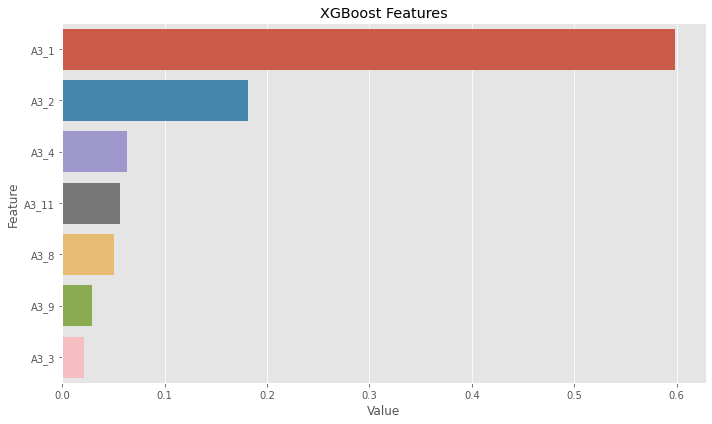

In [ ]:
LISTb = [729, 730, 731, 732, 736, 737, 739]
MLmodel_XGBplot(2, 3, LISTb)

In [ ]:
# XGBmodel_weights('2', '2')
# LGBMmodel_weights('2', '2')

Weight,Feature
0.2044 ± 0.0047,A3_1
0.1443 ± 0.0014,A3_6
0.1387 ± 0.0040,A3_2
0.0280 ± 0.0017,A3_4
0.0211 ± 0.0021,A3_5
0.0200 ± 0.0010,A3_8
0.0152 ± 0.0024,A3_15
0.0149 ± 0.0009,A3_11
0.0128 ± 0.0008,A3_3
0.0116 ± 0.0005,A3_16
